In [7]:
using CairoMakie
using Unitful
import PhysicalConstants.CODATA2018: h, m_e, c_0

In [8]:
Makie.set_theme!(
    Theme(
        Lines = (linewidth=2,),
    )
)

### Bremsstrahlung

Dipole pattern. Classical case is for beta = 0. 

Using cartesian plotting:

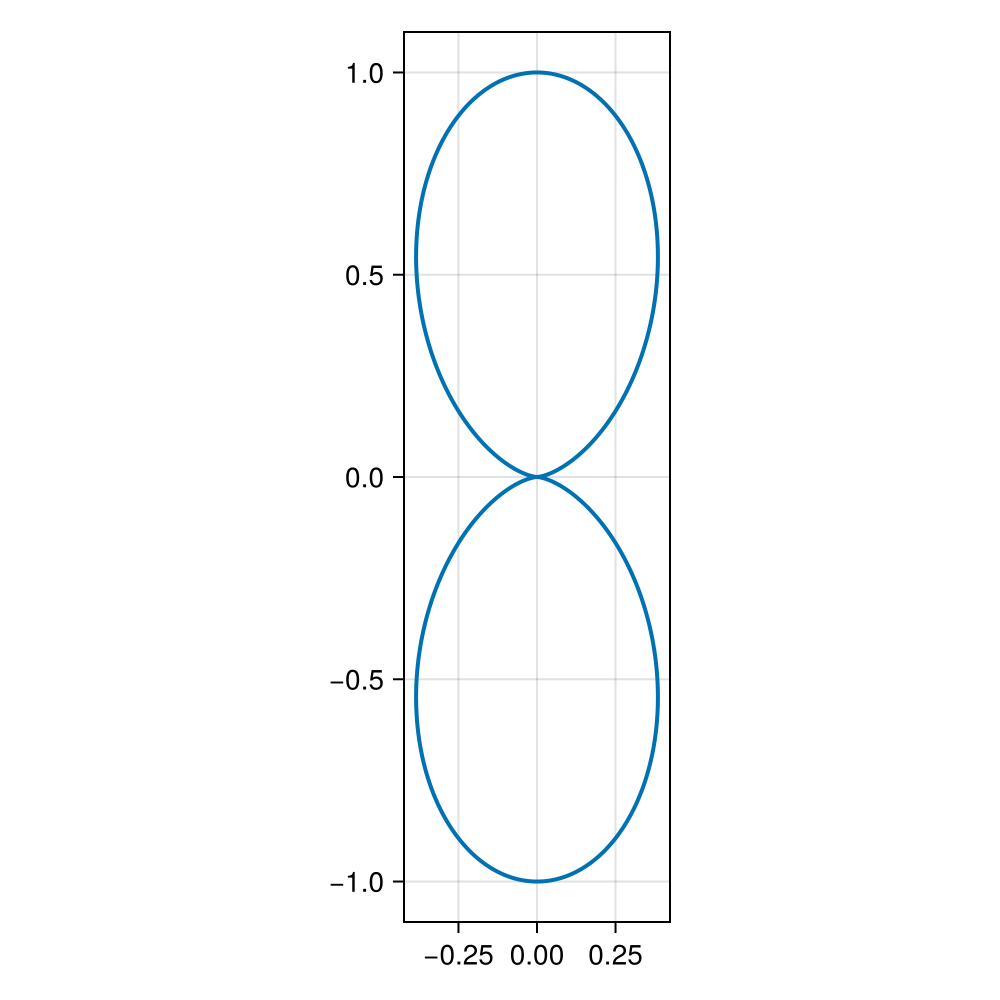

In [9]:
θ = range(0, 2π, 1000)
β = 0
r = sin.(θ) .^2 ./ (1 .- β * cos.(θ)) .^5

x = r .* cos.(θ)
y = r .* sin.(θ)

fig = Figure(size=(500,500))
ax = Axis(fig[1,1], aspect=0.3)
lines!(ax, x, y)
fig

And using the more convenient polar plot:

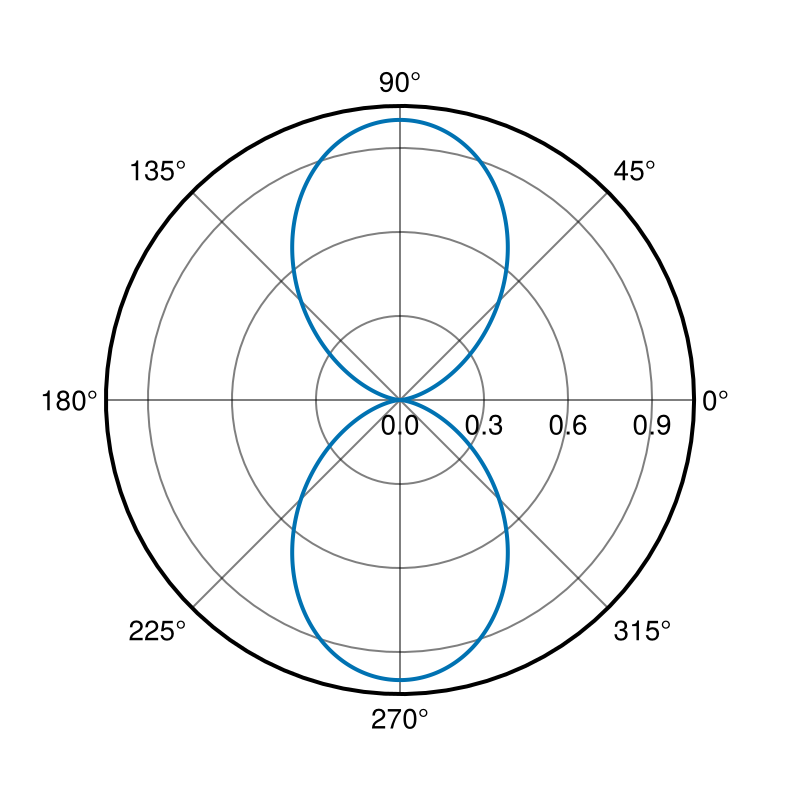

In [10]:
θ = range(0, 2π, 1000)
β = 0
r = sin.(θ) .^2 ./ (1 .- β * cos.(θ)) .^5
fig = Figure(size=(400,400))
ax = PolarAxis(fig[1,1])
lines!(ax, θ, r)
fig

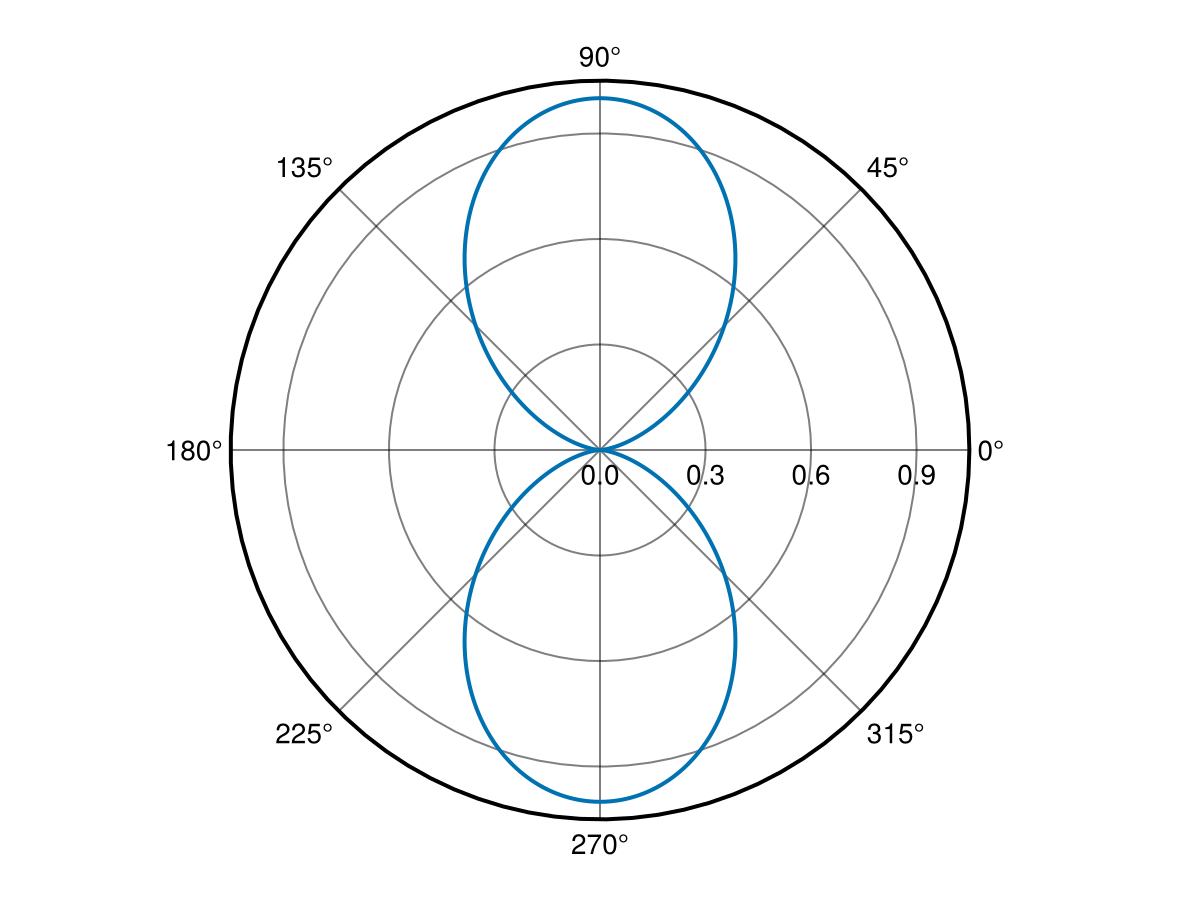

In [11]:
# Fewer lines of code
θ = range(0, 2π, 1000)
β = 0
r = sin.(θ) .^2 ./ (1 .- β * cos.(θ)) .^5
lines(θ, r; axis=(type=PolarAxis,))

Relativistic case, $\beta=v/c$:

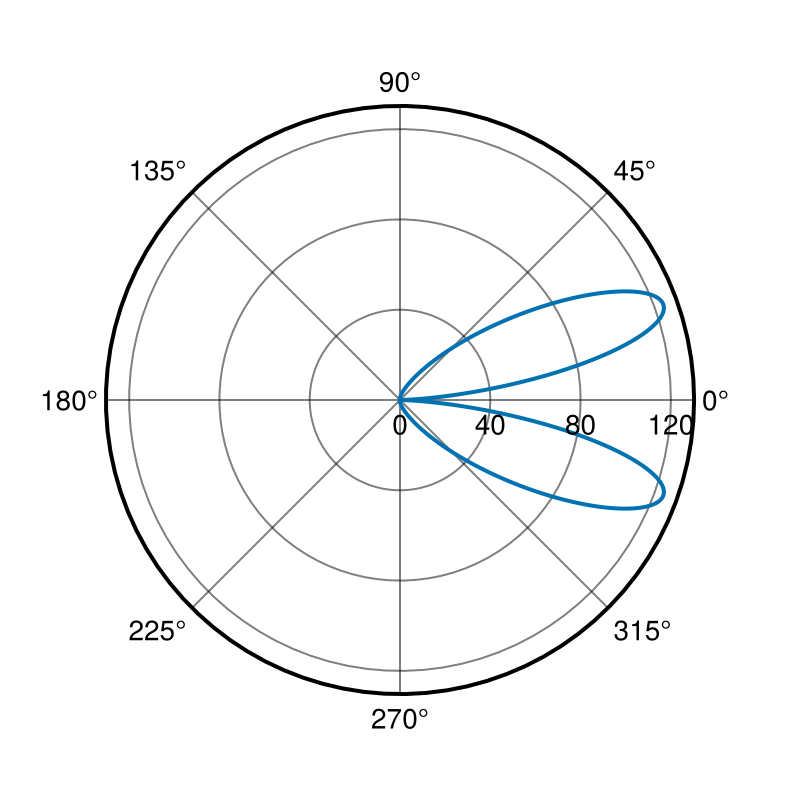

In [12]:
θ = range(0, 2π, 1000)
β = 0.8
r = sin.(θ) .^2 ./ (1 .- β * cos.(θ)) .^5
fig = Figure(size=(400,400))
ax = PolarAxis(fig[1,1])
lines!(ax, θ, r)
fig

In 3D, cut in half for better visualisation:

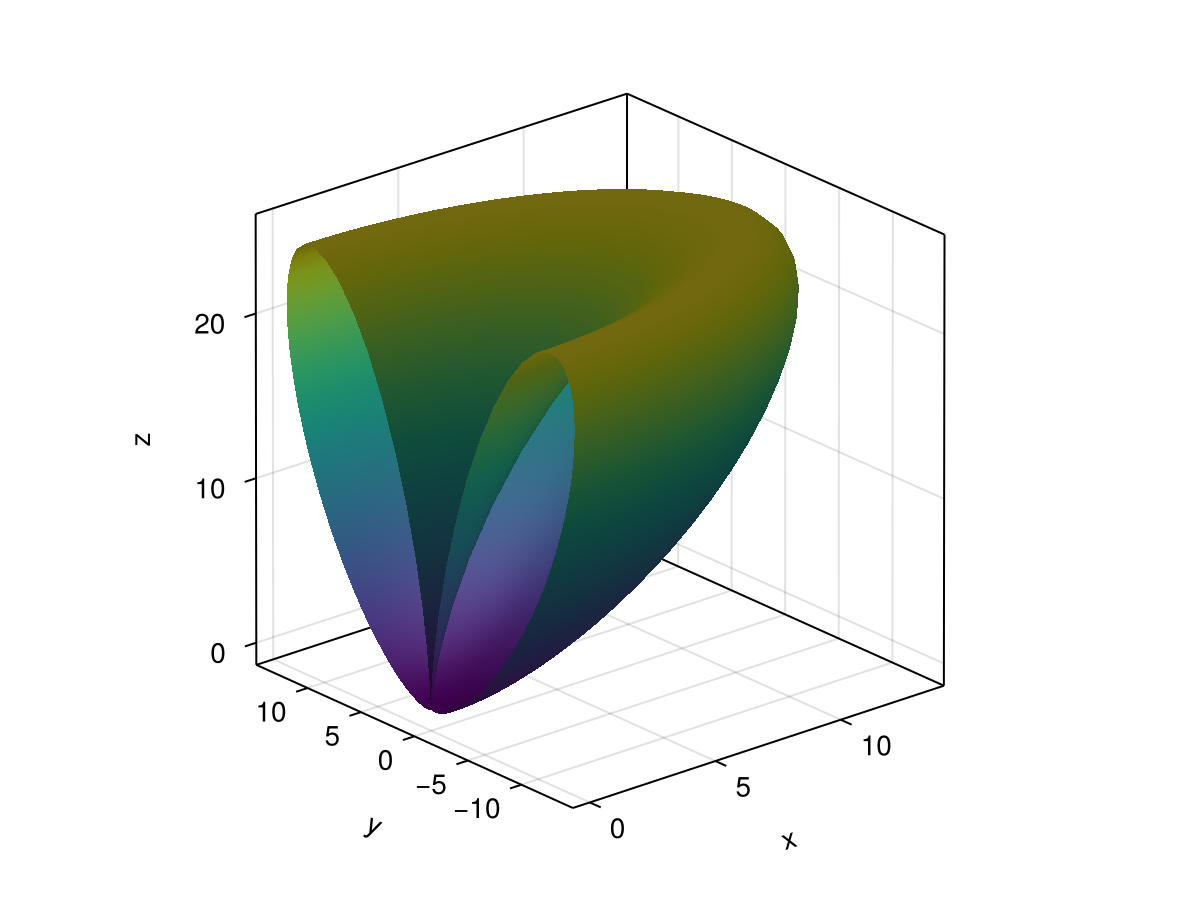

In [29]:
phi = range(-π/2, π/2, 100)
theta = range(0, π, 100)

β = 0.7
r = sin.(theta) .^2 ./ ((1 .- β * cos.(theta)) .^5)

X = r' .* sin.(phi) .* sin.(theta)'
Y = r' .* cos.(phi) .* sin.(theta)'
Z = repeat(r .* cos.(theta), outer=(1, 100))'

surface(Y, X, Z; axis=(type=Axis3, aspect=(1,1,1)))

### Thomson scattering

Direction of propagation is perpendicular to acceleration (E field), so angle $\theta$ is the complementary of the Bremsstrahlung. For linearly polarised radiation:

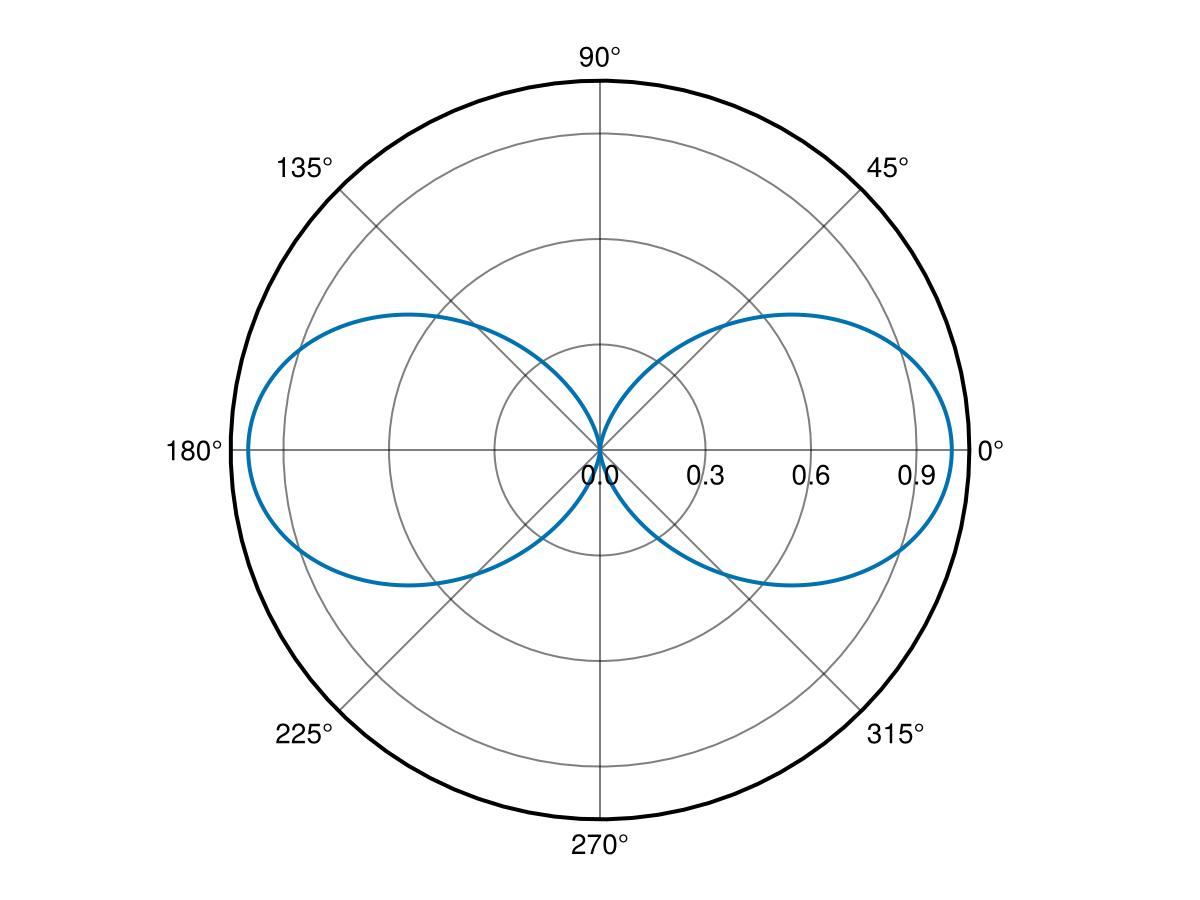

In [14]:
θ = range(0, 2π, 1000)
r = sin.(θ .- π/2) .^ 2
lines(θ, r; axis=(type=PolarAxis,))

This is equivalent to using a different angle:

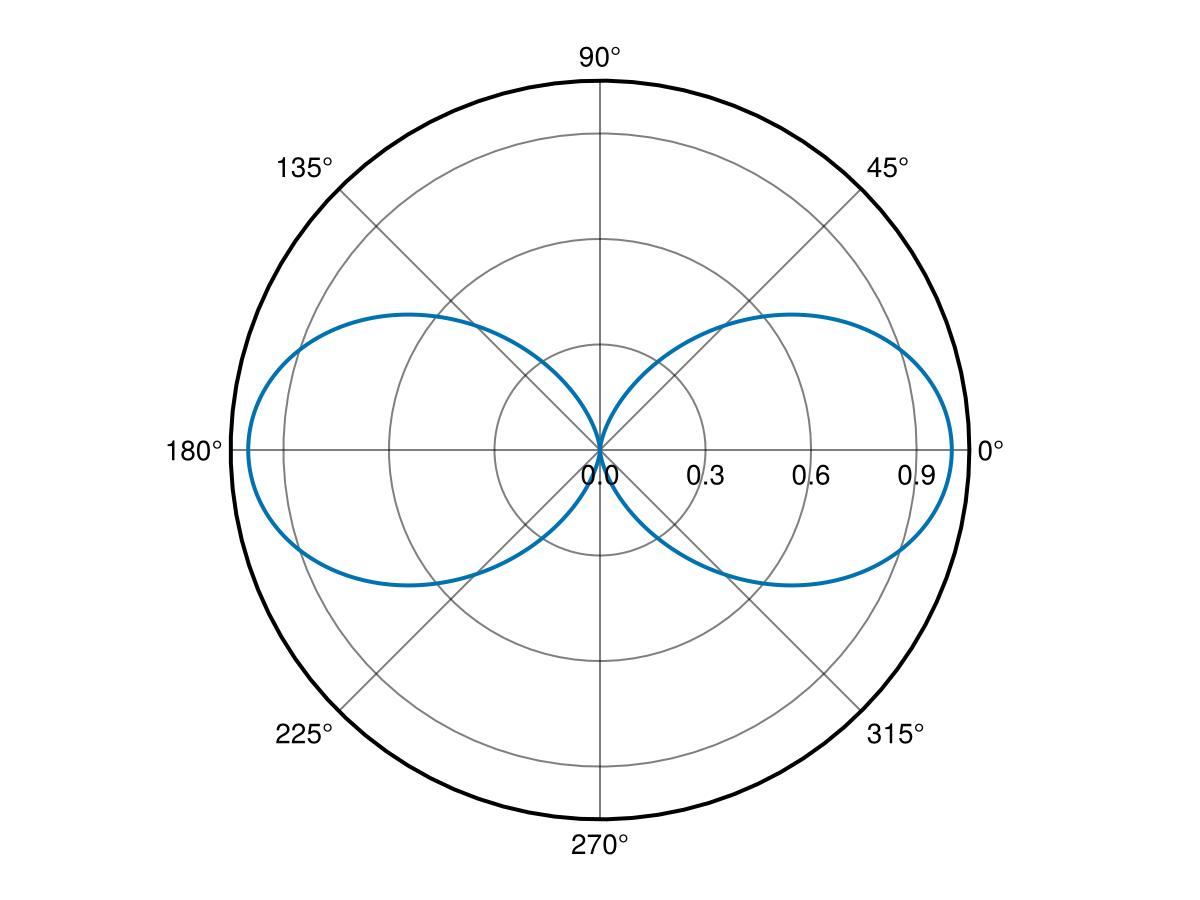

In [15]:
ϕ = range(0, 2π, 1000)
r = cos.(ϕ) .^ 2
lines(ϕ, r; axis=(type=PolarAxis,))

For the unpolarised case:

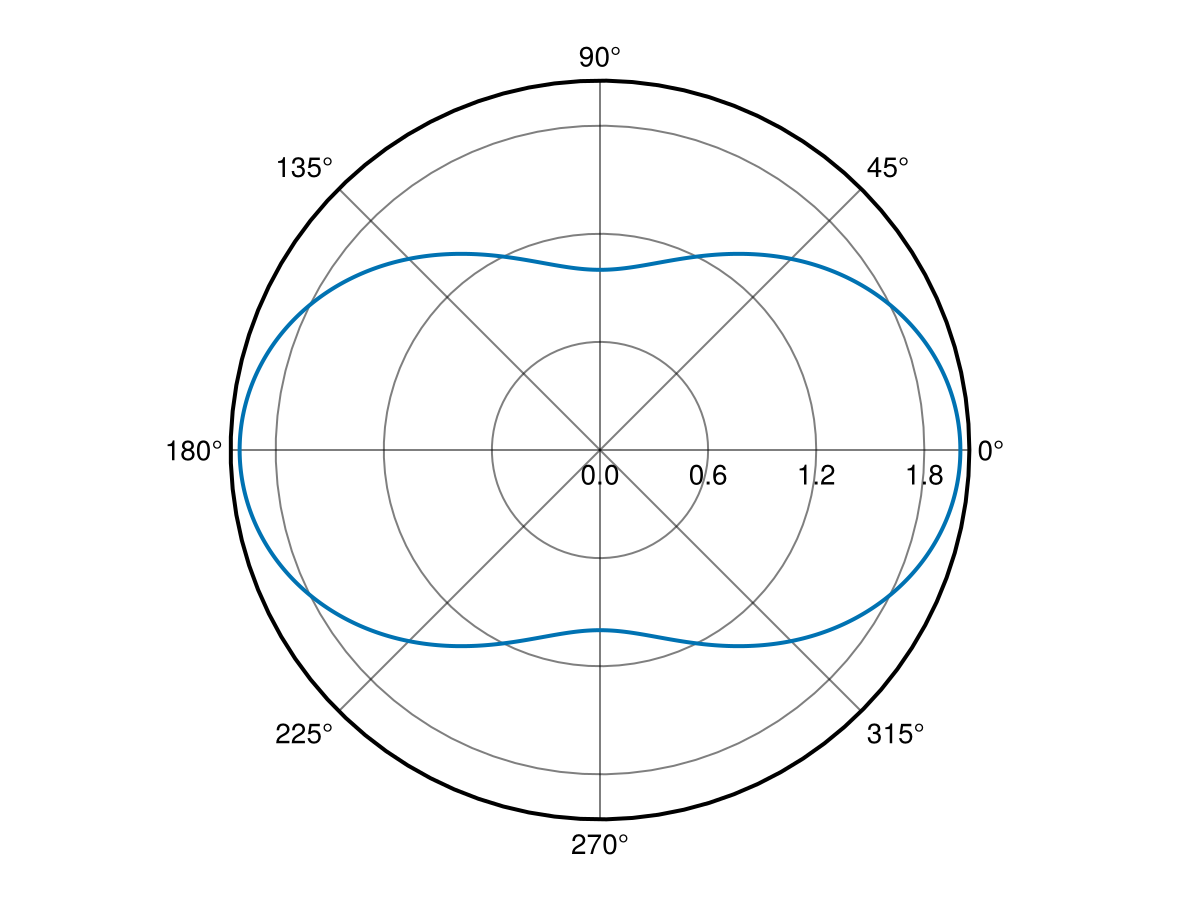

In [16]:
ϕ = range(0, 2π, 1000)
r = 1 .+ cos.(ϕ) .^ 2
lines(ϕ, r; axis=(type=PolarAxis,))

In the polarised relativistic case, the differential cross section can be written as:

$$
\left[\frac{d\sigma}{d\Omega}\right]_\mathrm{pol} = r_0^2\frac{\omega^4}{(\omega^2-\omega_0^2)^2+\Gamma^2\omega^2} \frac{(1-\beta\cos\theta)^2-\frac{1}{\gamma}\sin^2\theta\cos^2\phi}{(1-\beta\cos\theta)^5)}
$$

And the plot becomes:

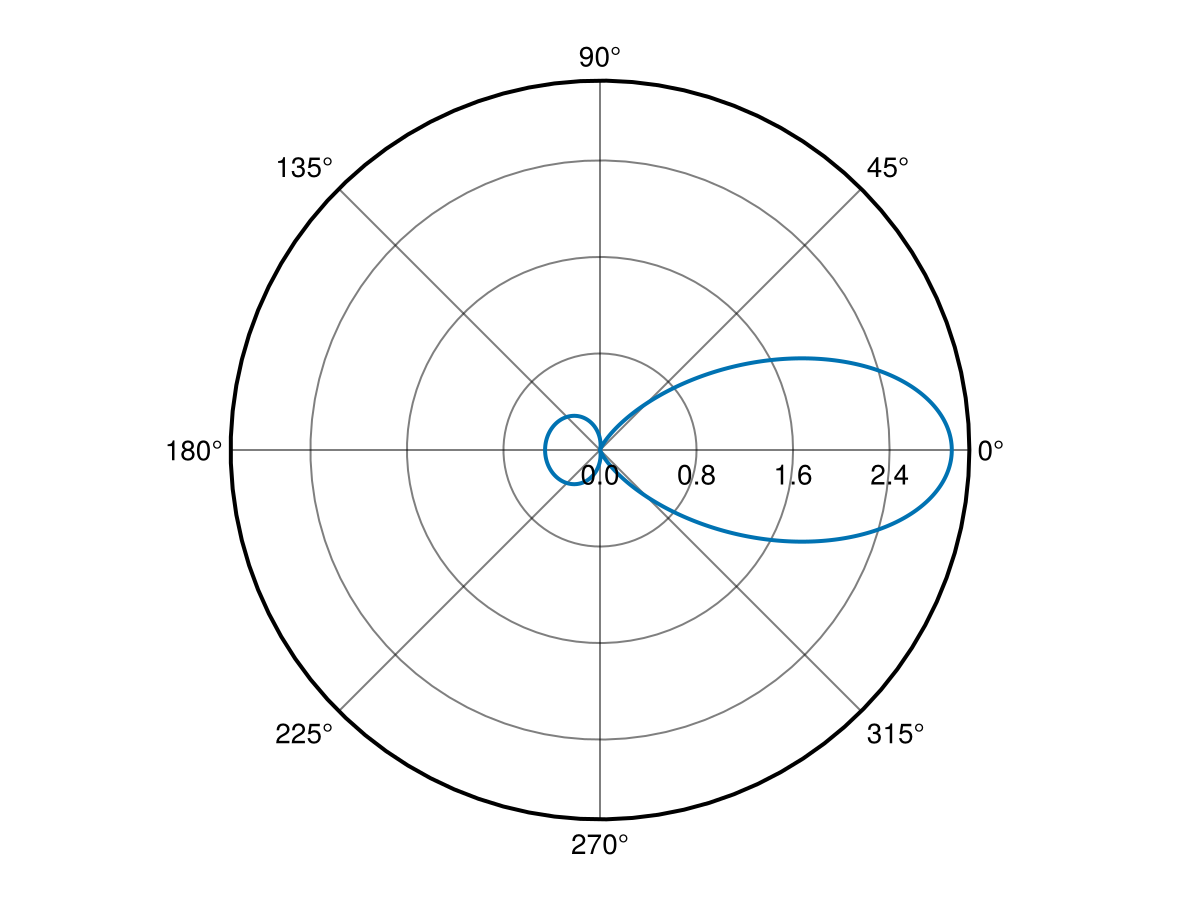

In [17]:
θ = range(0, 2π, 1000)
β = 0.3
γ = 1 / sqrt(1 - β^2)
r = ((1 .- β * cos.(θ)).^2 .- (sin.(θ)/γ).^2 ) ./ (1 .- β * cos.(θ)).^5

lines(θ, r; axis=(type=PolarAxis,))

In 3D, non-relativistic unpolarised:

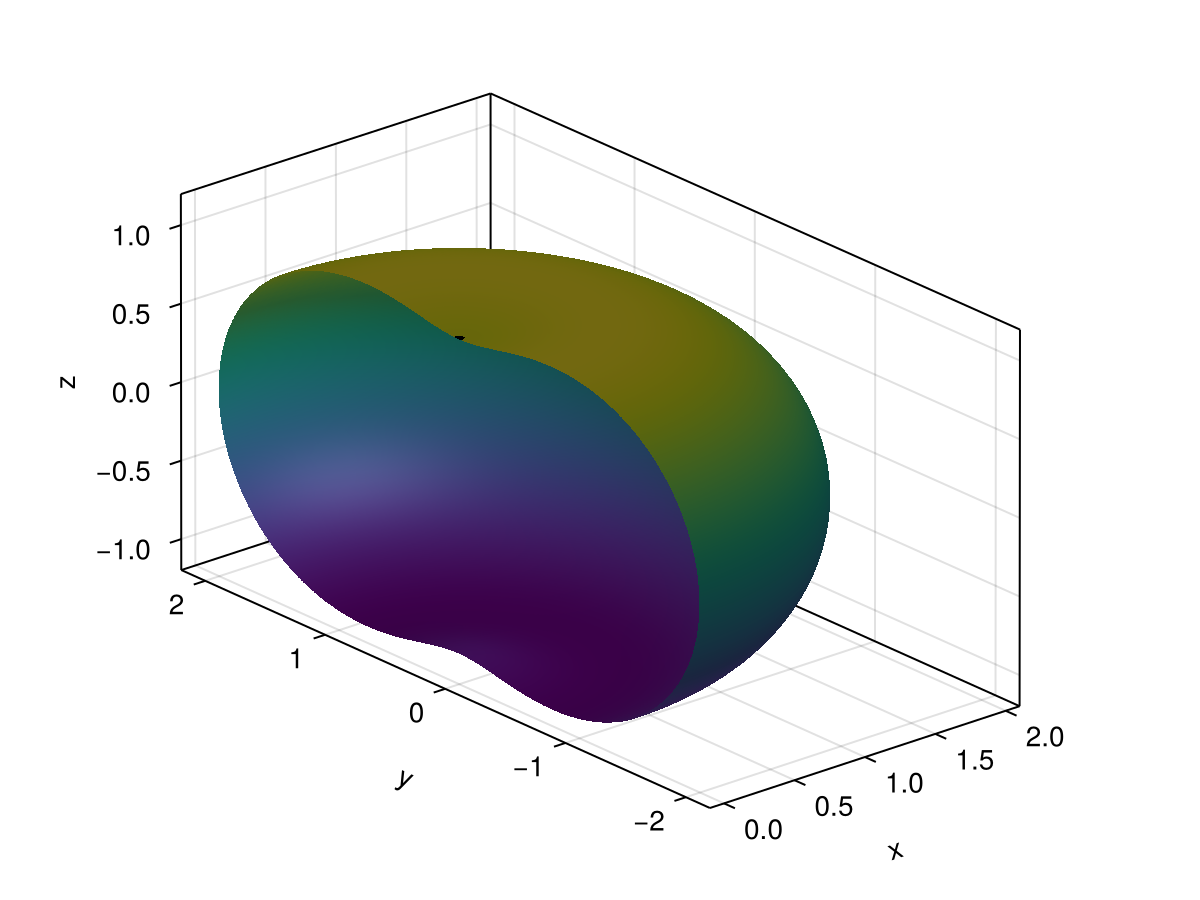

In [18]:
phi = range(-π/2, π/2, 100)
theta = range(0, π, 100)

β = 0.7
r = 1 .+ sin.(theta) .^2

X = r' .* sin.(phi) .* sin.(theta)'
Y = r' .* cos.(phi) .* sin.(theta)'
Z = repeat(r .* cos.(theta), outer=(1, 100))'
surface(Y, X, Z; axis=(type=Axis3, aspect=(1,2,1)))

### Compton-Klein-Nishina scattering

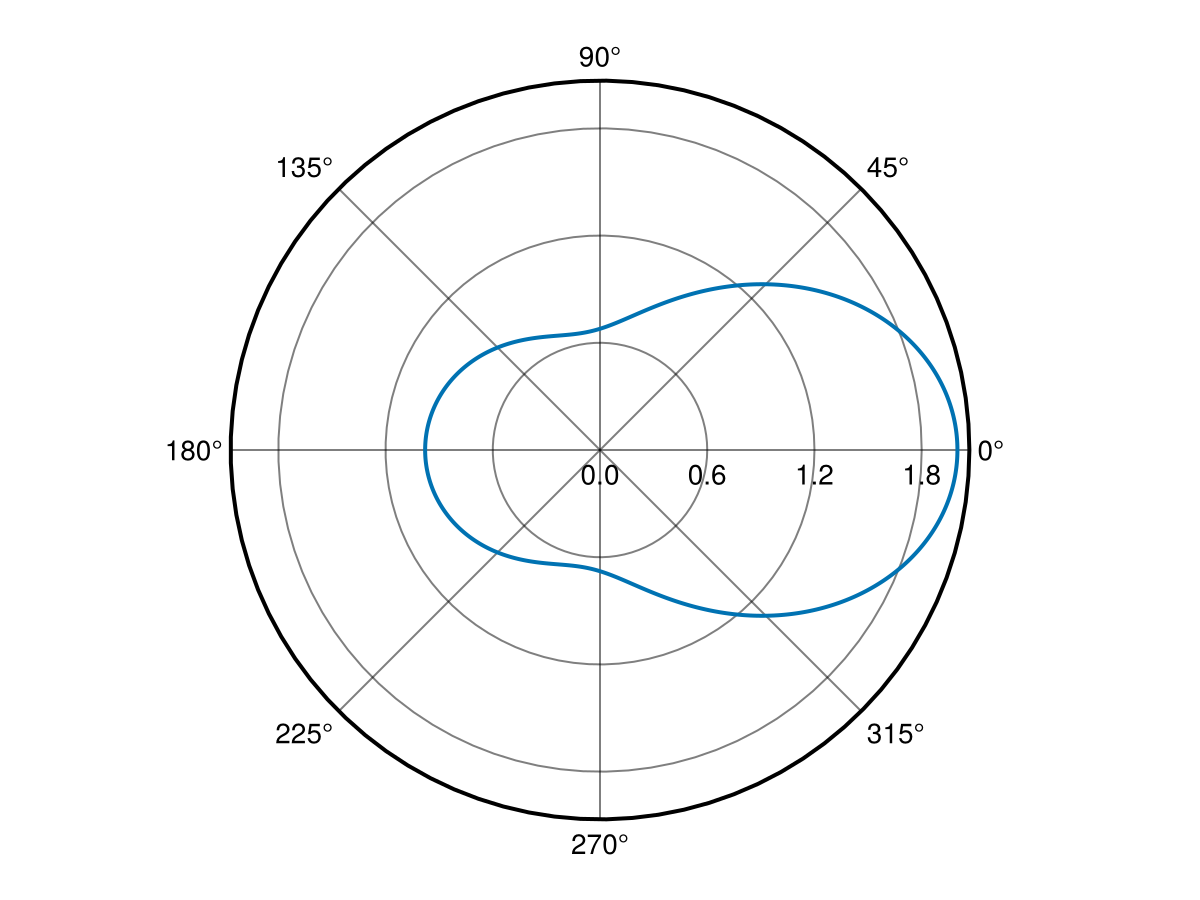

In [19]:
ϕ = range(0, 2π, 1000)

function diff_sigma(λ1, θ)
    # Compton formula
    λ2 = h / (m_e * c_0) .* (1 .- cos.(θ)) .+ λ1
    # Klein-Nishina formula
    return ((λ1 ./ λ2).^2 .* (λ1 ./ λ2 + λ2 ./ λ1 .- sin.(θ).^2)) .|> u"m/m"
end

r = diff_sigma(0.01u"nm", ϕ)
lines(ϕ, r; axis=(type=PolarAxis,))

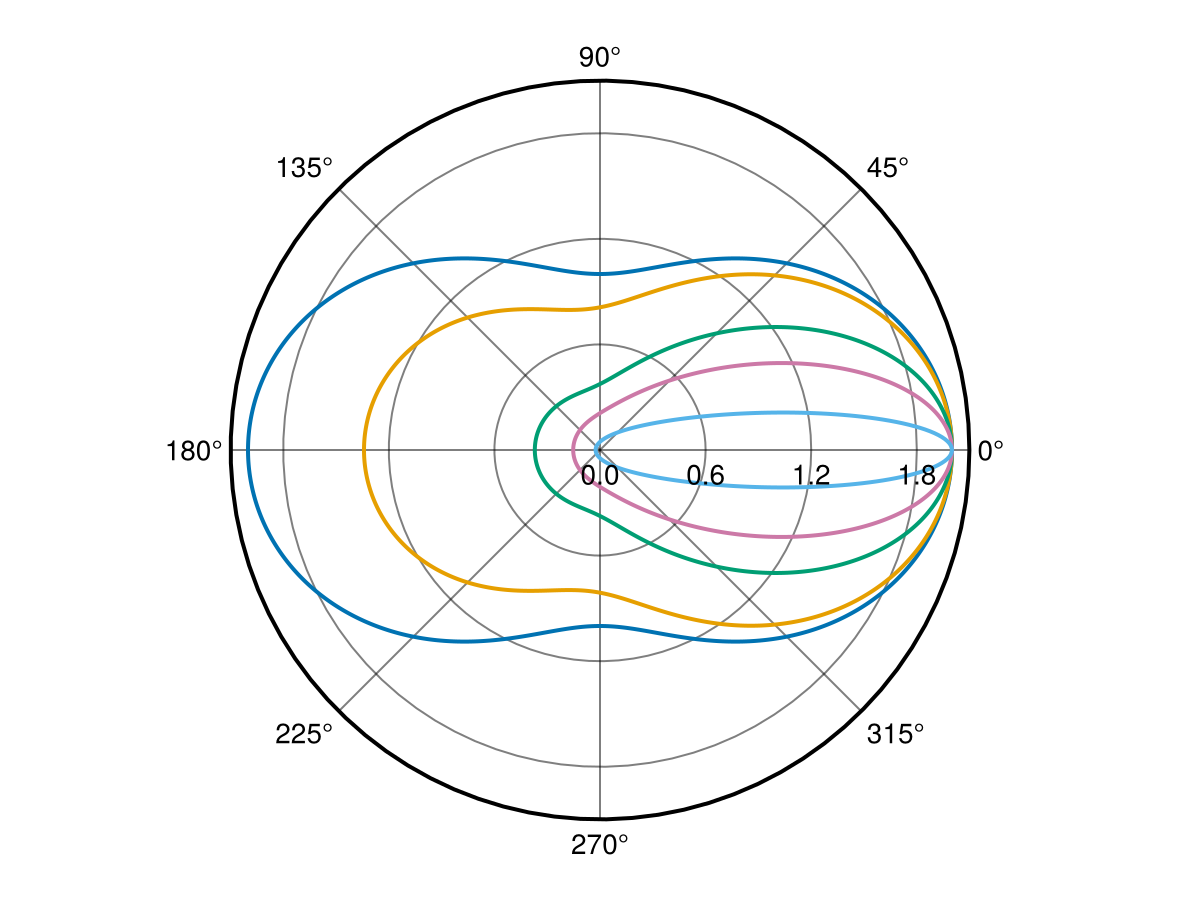

In [20]:
energies = [3, 60e3, 511e3, 1.46e6, 10e6]u"eV"

fig = Figure()
ax = PolarAxis(fig[1,1])

for e in energies
    r = diff_sigma(h * c_0 / e, ϕ)
    lines!(ax, ϕ, r; label=e)
end
fig

In 3D:

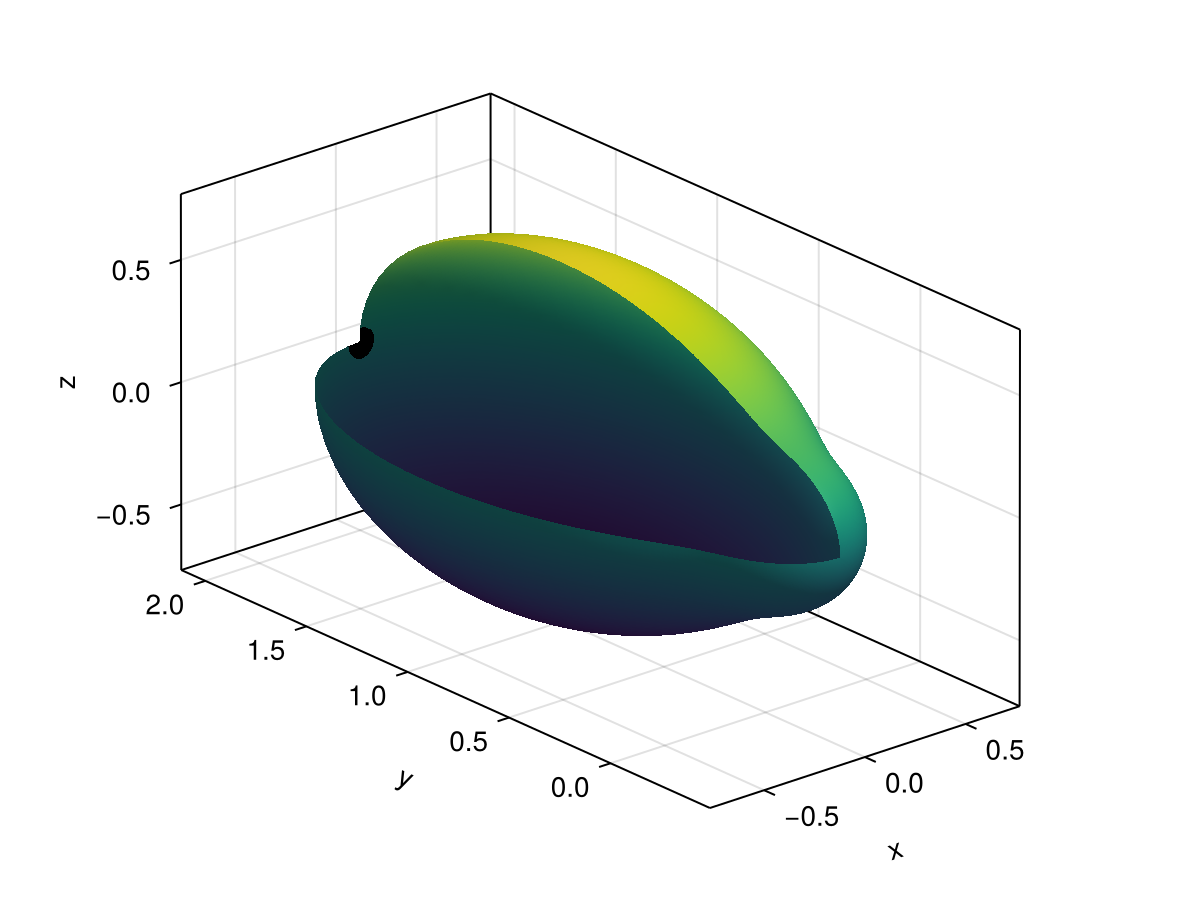

In [21]:
phi = range(-π, π/2, 100)
theta = range(0, π, 100)

r = diff_sigma.(h * c_0 / 511u"keV", theta)

Z = r' .* sin.(phi) .* sin.(theta)'
Y = r' .* cos.(phi) .* sin.(theta)'
X = repeat(r .* cos.(theta), outer=(1, 100))'
surface(Y, X, Z; axis=(type=Axis3, aspect=(1,2,1)))